In [1]:
%pip install -qq -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import geopandas as gpd
from datasets_tourism import *
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import branca
import numpy as np
import networkx as nx
from shapely.geometry import Point, LineString
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
import pyrosm 
import contextily as cx
pd.options.mode.chained_assignment = None  # default='warn'

> 2024-06-20 08:25:30,371 [info] Project loaded successfully: {'project_name': 'overtourism'}


In [39]:
START_DATE = "2023-07-01"
END_DATE= "2023-08-31"

# Parcheggi

In [3]:
statistiche_parcheggi_molveno_df["date"] = pd.to_datetime(statistiche_parcheggi_molveno_df["date"])
statistiche_parcheggi_molveno_df

,20 MIN,40 MIN,1 ORA,1 ORA E 20 MIN,1 ORA E 40 MIN,2 ORE,3 ORE,4 ORE,5 ORE,6 ORE,...,1 GIORNO,2 GIORNI,3 GIORNI,4 GIORNI,5 GIORNI,6 GIORNI,7 GIORNI,8 GIORNI,TOTALE,date
0,1.0,3.0,3.0,9.0,6.0,4.0,12.0,8.0,7.0,13.0,...,0.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,99.0,2022-07-27
1,1.0,4.0,5.0,4.0,10.0,14.0,35.0,23.0,22.0,21.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,156.0,2022-07-28
2,1.0,2.0,8.0,7.0,10.0,16.0,38.0,21.0,13.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142.0,2022-07-29
3,5.0,15.0,21.0,23.0,35.0,22.0,107.0,83.0,85.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,604.0,2022-07-30
4,8.0,11.0,24.0,39.0,45.0,34.0,123.0,121.0,141.0,140.0,...,3.0,8.0,2.0,1.0,0.0,0.0,0.0,0.0,1056.0,2022-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0.0,2.0,1.0,1.0,0.0,1.0,1.0,3.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2023-09-27
428,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2023-09-28
429,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,2.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,2023-09-29
430,0.0,4.0,2.0,7.0,5.0,4.0,9.0,13.0,6.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,2023-09-30


In [27]:
statistiche_parcheggi_molveno_df[statistiche_parcheggi_molveno_df.columns[:-1]] = statistiche_parcheggi_molveno_df[statistiche_parcheggi_molveno_df.columns[:-1]].astype(int)

In [6]:
parking_duration = list(statistiche_parcheggi_molveno_df.columns[:-10])
parking_duration.append("TOTALE")

## Capienza massima (2022-08-15)

In [38]:
statistiche_parcheggi_molveno_df[["date", "TOTALE"]].sort_values(by=["TOTALE"], ascending=False).head(10)

,date,TOTALE
19,2022-08-15,1257
20,2022-08-16,1244
354,2023-07-16,1169
18,2022-08-14,1152
389,2023-08-20,1142
388,2023-08-19,1114
383,2023-08-14,1112
21,2022-08-17,1074
4,2022-07-31,1056
382,2023-08-13,1050


In [29]:
statistiche_parcheggi_molveno_df[["TOTALE"]].max()

TOTALE    1257
dtype: int64

In [30]:
statistiche_parcheggi_molveno_df[statistiche_parcheggi_molveno_df["TOTALE"] == 1257]

,20 MIN,40 MIN,1 ORA,1 ORA E 20 MIN,1 ORA E 40 MIN,2 ORE,3 ORE,4 ORE,5 ORE,6 ORE,...,1 GIORNO,2 GIORNI,3 GIORNI,4 GIORNI,5 GIORNI,6 GIORNI,7 GIORNI,8 GIORNI,TOTALE,date
19,28,5,31,30,46,44,181,203,208,167,...,2,9,4,1,0,0,0,0,1257,2022-08-15


<Axes: xlabel='date'>

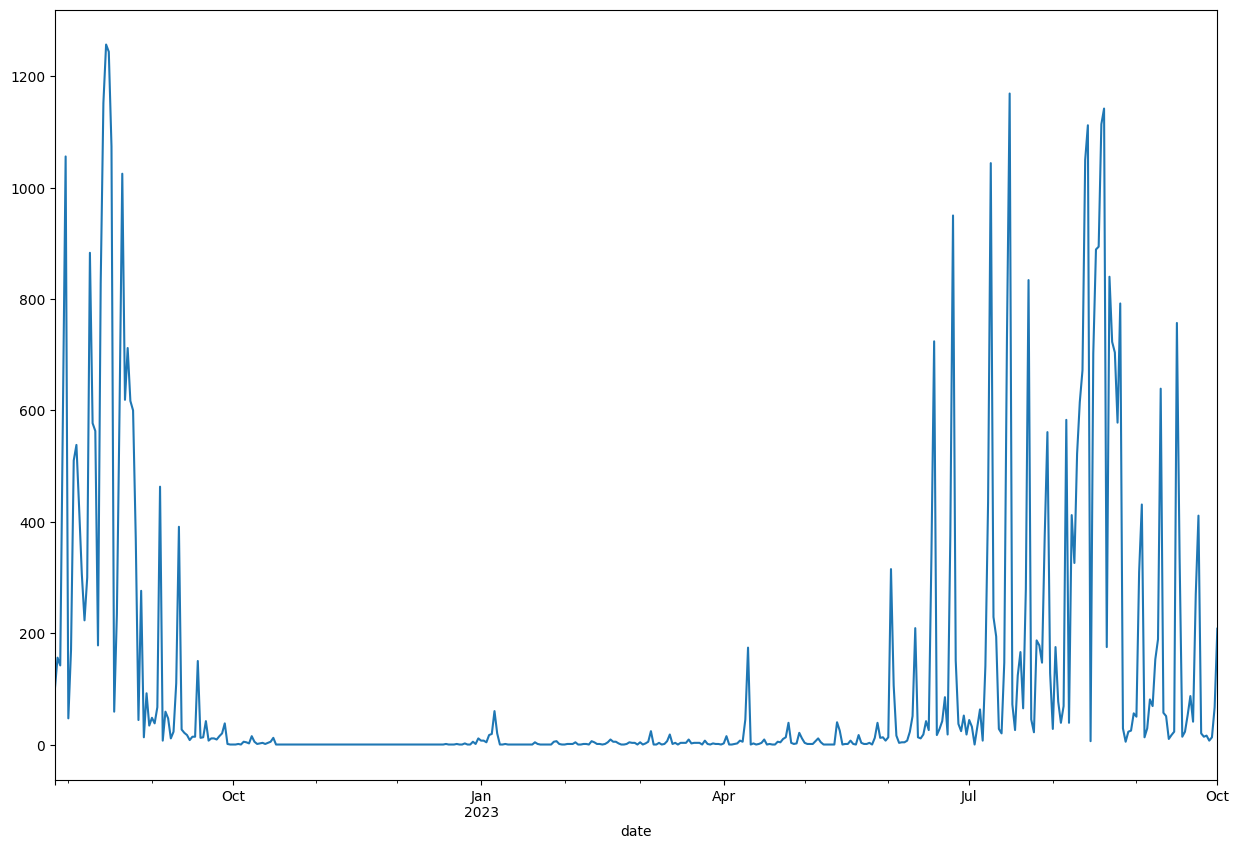

In [31]:
statistiche_parcheggi_molveno_df.groupby("date")["TOTALE"].max().plot(x="date", figsize=(15, 10))

# Contamezzi (Spiaggia)

In [41]:
contamezzi_df.rename(columns={"data": "date"}, inplace=True)
contamezzi_df["date"] = pd.to_datetime(contamezzi_df["date"])
contamezzi_df["day"] = pd.to_datetime(pd.to_datetime(contamezzi_df["date"]).dt.date)
contamezzi_df["hour"] = pd.to_datetime(contamezzi_df["date"]).dt.hour
contamezzi_df = contamezzi_df[
    (contamezzi_df["date"] >= START_DATE) &
    (contamezzi_df["date"] <= END_DATE)
]
contamezzi_df["total_cars"] = contamezzi_df[["cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato"]].sum(axis=1)

In [42]:
entrata_lago = contamezzi_df[
    (contamezzi_df["sensore"] == "M47") & 
    (contamezzi_df["direzione"] == 1) & 
    (contamezzi_df["day"] >= START_DATE) & 
    (contamezzi_df["day"] <= END_DATE)]
entrata_lago = entrata_lago.reset_index().drop(columns=['index','sensore','direzione','comune'])

uscita_lago = contamezzi_df[
    (contamezzi_df["sensore"] == "M47") & 
    (contamezzi_df["direzione"] == 2) & 
    (contamezzi_df["day"] >= START_DATE) & 
    (contamezzi_df["day"] <= END_DATE)]
uscita_lago = uscita_lago.reset_index().drop(columns=['index','sensore','direzione','comune'])

differenza_lago = entrata_lago.set_index(['date','day','hour']).subtract(uscita_lago.set_index(['date','day','hour']), fill_value=0).reset_index()

cumulativa_lago = differenza_lago.copy()
for c in ['cl1','cl2','cl3','cl4','cl5','cl6','cl7','nonrilevato','total_cars']: 
    cumulativa_lago[c] = cumulativa_lago[c].cumsum()
cumulativa_lago

,date,day,hour,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
0,2023-07-01 00:00:00,2023-07-01,0,6,-1,0,0,0,0,0,0,5
1,2023-07-01 01:00:00,2023-07-01,1,7,-1,0,0,0,0,0,0,6
2,2023-07-01 02:00:00,2023-07-01,2,7,-1,0,0,0,0,0,0,6
3,2023-07-01 03:00:00,2023-07-01,3,7,0,0,0,0,0,0,0,7
4,2023-07-01 04:00:00,2023-07-01,4,9,1,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1460,2023-08-30 20:00:00,2023-08-30,20,12360,1476,-27,680,931,-50,-29,-2547,12794
1461,2023-08-30 21:00:00,2023-08-30,21,12338,1477,-26,679,931,-50,-29,-2547,12773
1462,2023-08-30 22:00:00,2023-08-30,22,12334,1478,-26,679,931,-50,-29,-2546,12771
1463,2023-08-30 23:00:00,2023-08-30,23,12326,1478,-26,680,931,-50,-29,-2546,12764


## Cumulativa max

In [57]:
cumulativa_lago.max()

date           2023-08-31 00:00:00
day            2023-08-31 00:00:00
hour                            23
cl1                          12454
cl2                           1577
cl3                            429
cl4                            804
cl5                            931
cl6                             12
cl7                              1
nonrilevato                      0
total_cars                   13193
dtype: object

In [54]:
cumulativa_lago.sort_values(by=["total_cars"], ascending=False).head(10)

,date,day,hour,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
1358,2023-08-26 14:00:00,2023-08-26,14,12454,1571,19,654,870,-42,-24,-2309,13193
1359,2023-08-26 15:00:00,2023-08-26,15,12445,1577,17,656,876,-42,-24,-2313,13192
1357,2023-08-26 13:00:00,2023-08-26,13,12429,1557,18,650,869,-42,-23,-2302,13156
1360,2023-08-26 16:00:00,2023-08-26,16,12410,1565,10,653,869,-42,-25,-2344,13096
1356,2023-08-26 12:00:00,2023-08-26,12,12369,1543,18,647,864,-42,-23,-2298,13078
1355,2023-08-26 11:00:00,2023-08-26,11,12227,1528,10,645,861,-40,-23,-2292,12916
1361,2023-08-26 17:00:00,2023-08-26,17,12386,1491,-52,627,861,-51,-26,-2424,12812
1460,2023-08-30 20:00:00,2023-08-30,20,12360,1476,-27,680,931,-50,-29,-2547,12794
1459,2023-08-30 19:00:00,2023-08-30,19,12363,1471,-27,680,931,-50,-29,-2548,12791
1455,2023-08-30 15:00:00,2023-08-30,15,12362,1474,-31,676,926,-50,-29,-2542,12786


## Differenza max

In [56]:
differenza_lago.max()

date           2023-08-31 00:00:00
day            2023-08-31 00:00:00
hour                            23
cl1                            304
cl2                             41
cl3                             16
cl4                             11
cl5                              9
cl6                              4
cl7                              3
nonrilevato                    119
total_cars                     353
dtype: object

In [55]:
differenza_lago.sort_values(by=["total_cars"], ascending=False).head(10)

,date,day,hour,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
202,2023-07-09 10:00:00,2023-07-09,10,304,24,4,1,7,0,0,13,353
370,2023-07-16 10:00:00,2023-07-16,10,300,20,7,3,2,-1,0,13,344
203,2023-07-09 11:00:00,2023-07-09,11,301,18,2,0,1,0,0,19,341
1258,2023-08-22 10:00:00,2023-08-22,10,222,41,15,6,5,1,0,44,334
371,2023-07-16 11:00:00,2023-07-16,11,233,32,4,-1,3,0,1,53,325
1282,2023-08-23 10:00:00,2023-08-23,10,253,39,3,2,3,-1,1,12,312
1210,2023-08-20 10:00:00,2023-08-20,10,288,17,7,0,1,1,-1,-2,311
1042,2023-08-13 10:00:00,2023-08-13,10,211,22,13,0,3,0,3,59,311
1066,2023-08-14 10:00:00,2023-08-14,10,214,25,5,4,7,4,0,48,307
1211,2023-08-20 11:00:00,2023-08-20,11,270,9,5,2,4,1,-1,13,303
